In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #for numerical operations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("/content/Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
def handelRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handelRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

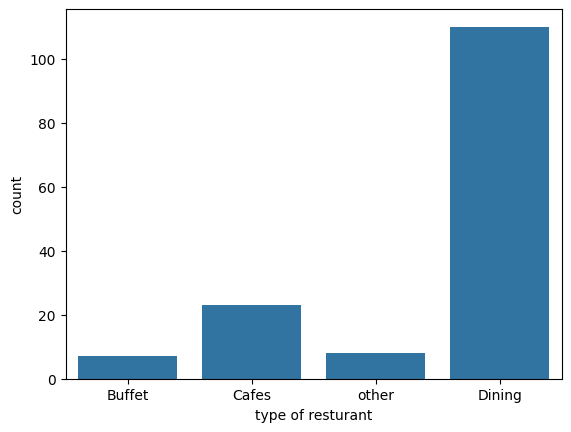

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

Text(0, 0.5, 'Votes')

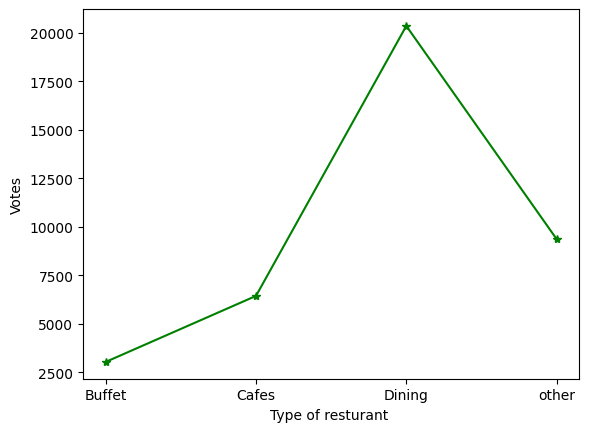

In [12]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker="*")
plt.xlabel("Type of resturant ")
plt.ylabel("Votes")

Conclution - dinning restarunts has recived maximum votes

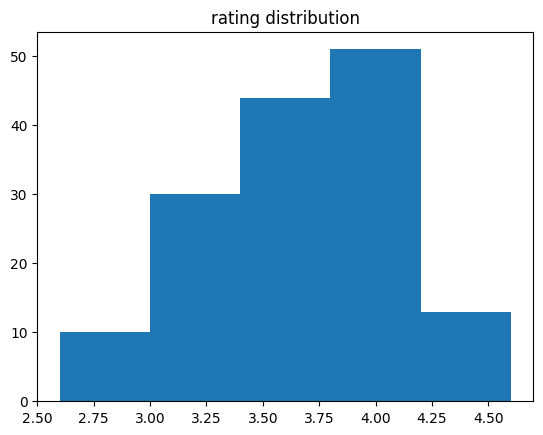

In [13]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show()

Conclusion-majority restuatunt received rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

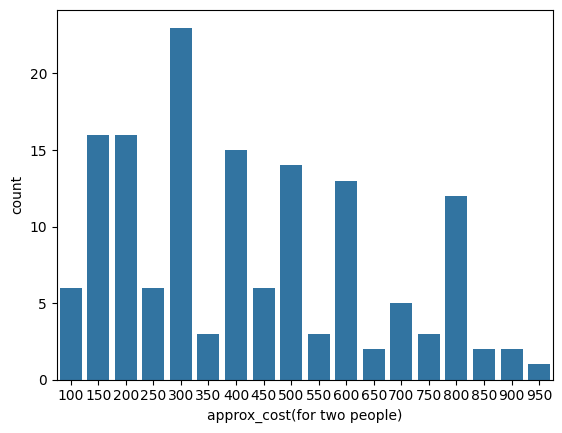

In [17]:
sns.countplot(x=dataframe["approx_cost(for two people)"])

Conclusion - the majority of couples preferr rasturants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

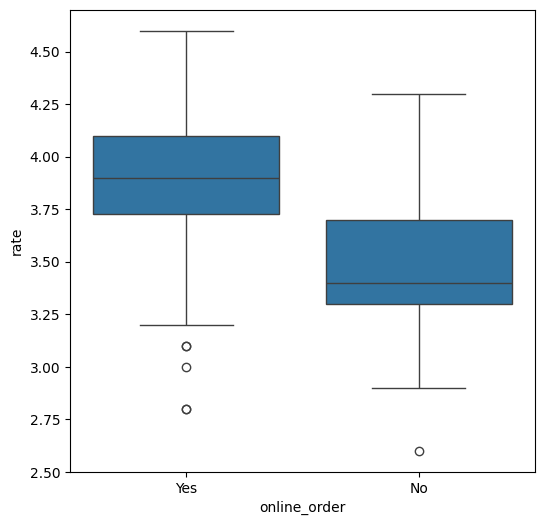

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate" ,data=dataframe)

Conclution - offline order received lower rating in comparison to online order

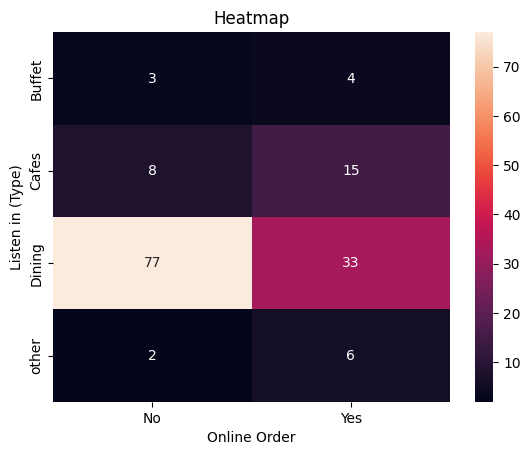

In [20]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listen in (Type)")
plt.show()

Conclusion - Dinning restarunt primarily accept the offline order,whereas cafes primarily recieve online order.This suggests that clients prefer orders in person at restaurants,but prefer online orderig at cafes